[ 0. 12. 24. 36. 48. 60.]


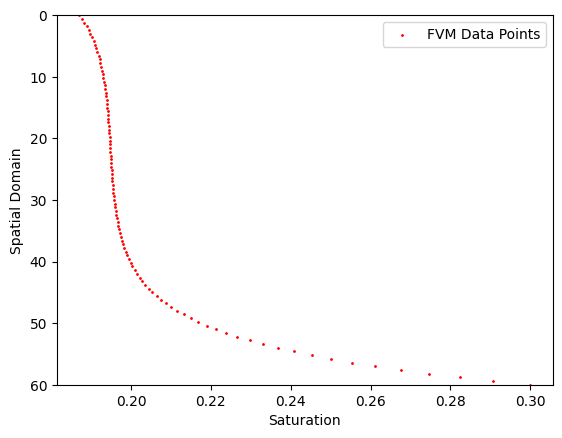

In [242]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


def applyPlotStyle():
    plt.ylim(60,0)
    plt.xlabel('Saturation')
    plt.ylabel('Spatial Domain')

# Read in training data
filename = "./data_profile_mean.txt"
df = pd.read_csv(filename, sep=',', header=None)
X = np.linspace(0, 60, 101)
y = df.values[0,:]

# Set up training/testing data and plot
# Random
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Equispaced
n=20
X_train = X[0::n]
X_test = np.delete(X, np.arange(0, X.size, n))
y_train = y[0::n]
y_test = np.delete(y, np.arange(0, y.size, n))

# Domain Knowledge
#indices = [0,10,20,30,40,50,60,100]
#X_train = X.take(indices)
#X_test = np.delete(X, indices)
#y_train = y.take(indices)
#y_test = np.delete(y, indices)

# Plot
plt.scatter(y, X, color='red', label='FVM Data Points',s=1)
#plt.scatter(y_train, X_train, s=20, color ="red", label ="Training Data")
applyPlotStyle()
plt.legend()

print(X_train)
#print(X_test)
#df.head()

-----Polynomial Regression with Full Data------


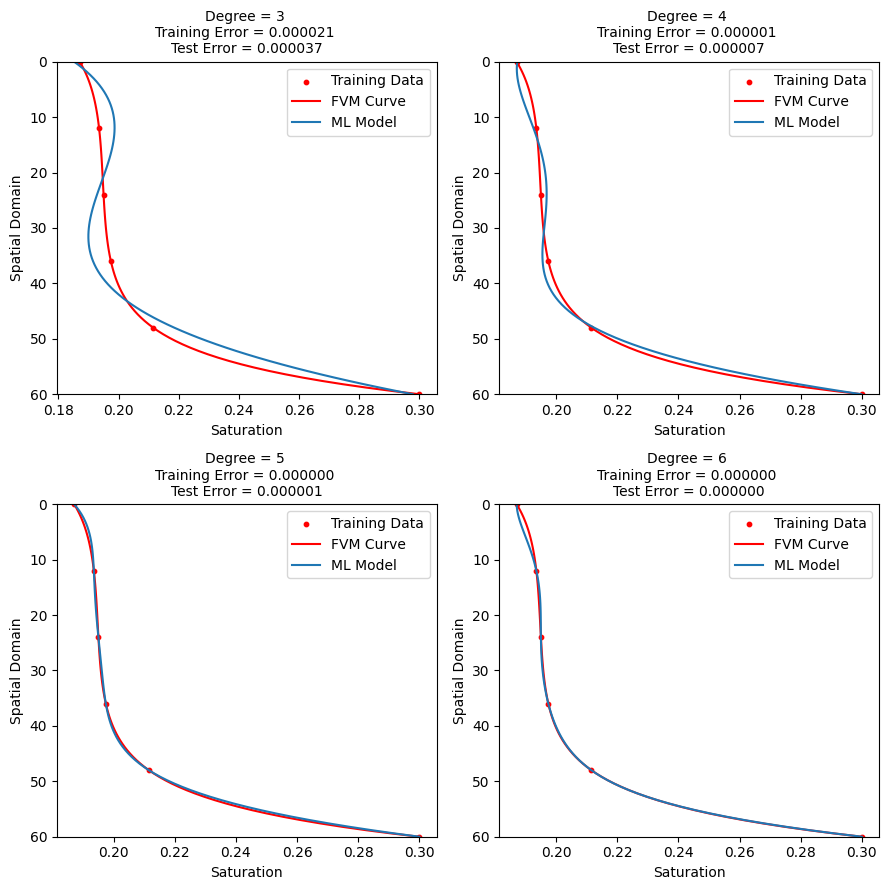

In [229]:
# Testing Polynomial Regression
print('-----Polynomial Regression with Full Data------')
plt.figure(figsize=(9,9))

# Fit model for several degrees and collect error
deg = [3,4,5,6]
poly_train_err = []
poly_test_err = []
poly_max_err = []
for d in deg:
    # Fit the model
    poly = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly.fit_transform(X_train.reshape(-1,1))
    poly_reg = LinearRegression()
    poly_reg.fit(poly_features, y_train)

    # Collect accuracy metric
    y_predict = poly_reg.predict(poly.fit_transform(X_test.reshape(-1,1)))
    test_err = mean_squared_error(y_predict, y_test)
    train_err = mean_squared_error(y_train, poly_reg.predict(poly_features))
    poly_train_err.append(train_err)
    poly_test_err.append(test_err)
    max_err = np.max(np.abs(y_test-y_predict))
    poly_max_err.append(max_err)



    # Plot 
    plt.subplot(2,2,d-2)
    plt.scatter(y_train, X_train, s=10, color="red", label="Training Data")
    plt.plot(y,X, color="red", label="FVM Curve")
    plt.plot(poly_reg.predict(poly.fit_transform(X.reshape(-1,1))), X, label = "ML Model")
    plt.title('Degree = %d \nTraining Error = %f \nTest Error = %f' %(d,train_err, test_err), fontsize=10)
    applyPlotStyle()
    plt.legend()

#plt.subplots_adjust(top=1.8, bottom=0.1, right=1.3)
plt.tight_layout()



([<matplotlib.axis.XTick at 0x2250f4d8100>,
 [Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), Text(6, 0, '6')])

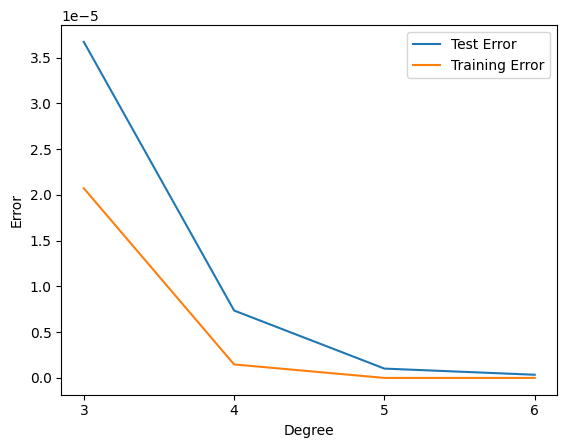

In [230]:
#Plot Training Test Error
plt.plot(deg, poly_test_err, label="Test Error")
plt.plot(deg, poly_train_err, label="Training Error")
#plt.plot(deg, poly_max_err, label = "Max Error")
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Error')
plt.xticks(deg)

-----Decision Tree Regression------


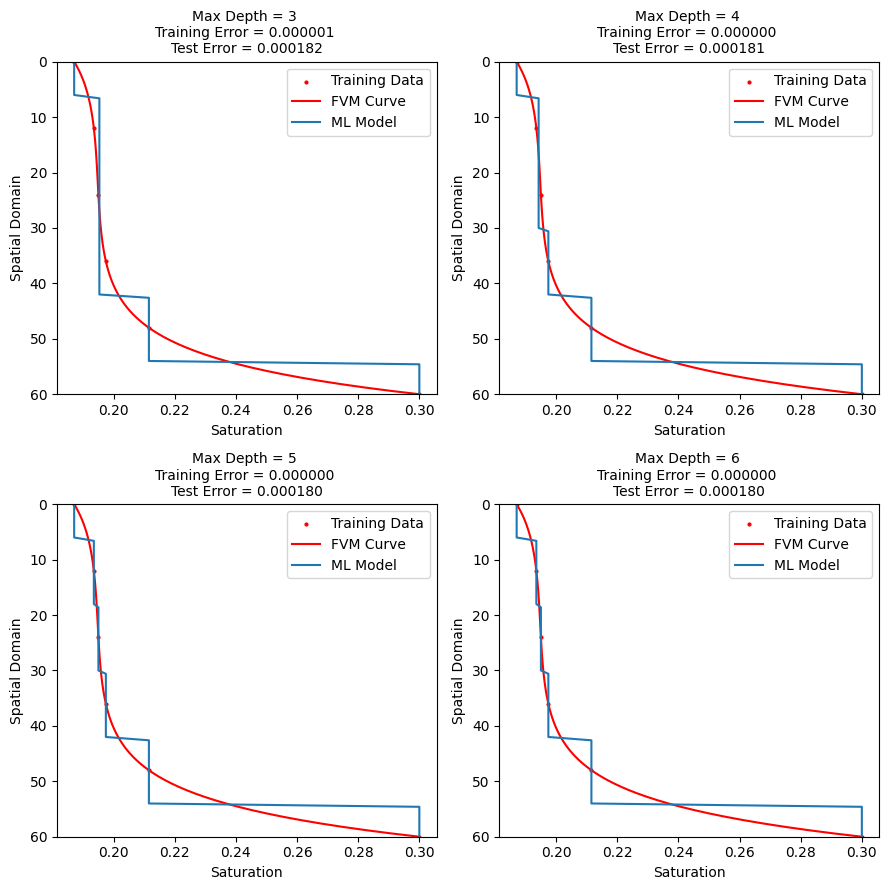

In [231]:
# Testing Decision Tree Regression
print('-----Decision Tree Regression------')
plt.figure(figsize=(9,9))

# Fit model for several degrees depths and collect error
depth = [3,4,5,6]
tree_train_err = []
tree_test_err = []
tree_max_err = []
for d in depth:
    # Fit the model
    tree_features = X_train.reshape(-1,1)
    tree_reg = DecisionTreeRegressor(max_depth=d, random_state=0)
    tree_reg.fit(tree_features, y_train)

    # Collect accuracy metric
    y_predict = tree_reg.predict(X_test.reshape(-1,1))
    test_err = mean_squared_error(y_predict, y_test)
    train_err = mean_squared_error(y_train, tree_reg.predict(tree_features))
    tree_train_err.append(train_err)
    tree_test_err.append(test_err)
    max_err = np.max(np.abs(y_test-y_predict))
    tree_max_err.append(max_err)

    # Plot 
    plt.subplot(2,2,d-2)
    plt.scatter(y_train, X_train, s=4, color="red", label="Training Data")
    plt.plot(y,X, color="red", label="FVM Curve")
    plt.plot(tree_reg.predict(X.reshape(-1,1)), X, label="ML Model")
    plt.title('Max Depth = %d \nTraining Error = %f \nTest Error = %f' %(d,train_err, test_err), fontsize=10)
    applyPlotStyle()
    plt.legend()

plt.tight_layout()




Text(0, 0.5, 'Error')

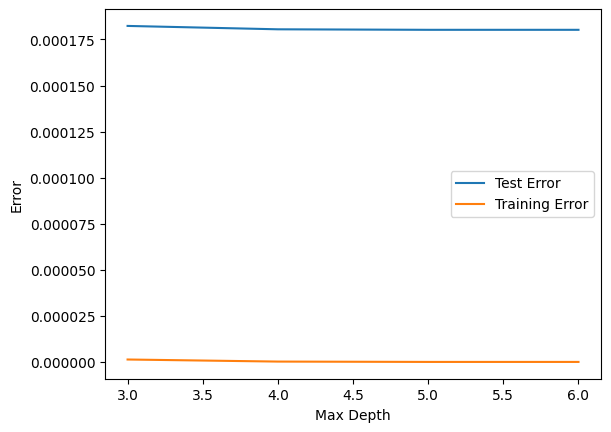

In [232]:
#Plot Training Test Error
plt.plot(depth, tree_test_err, label="Test Error")
plt.plot(depth, tree_train_err, label="Training Error")
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Error')

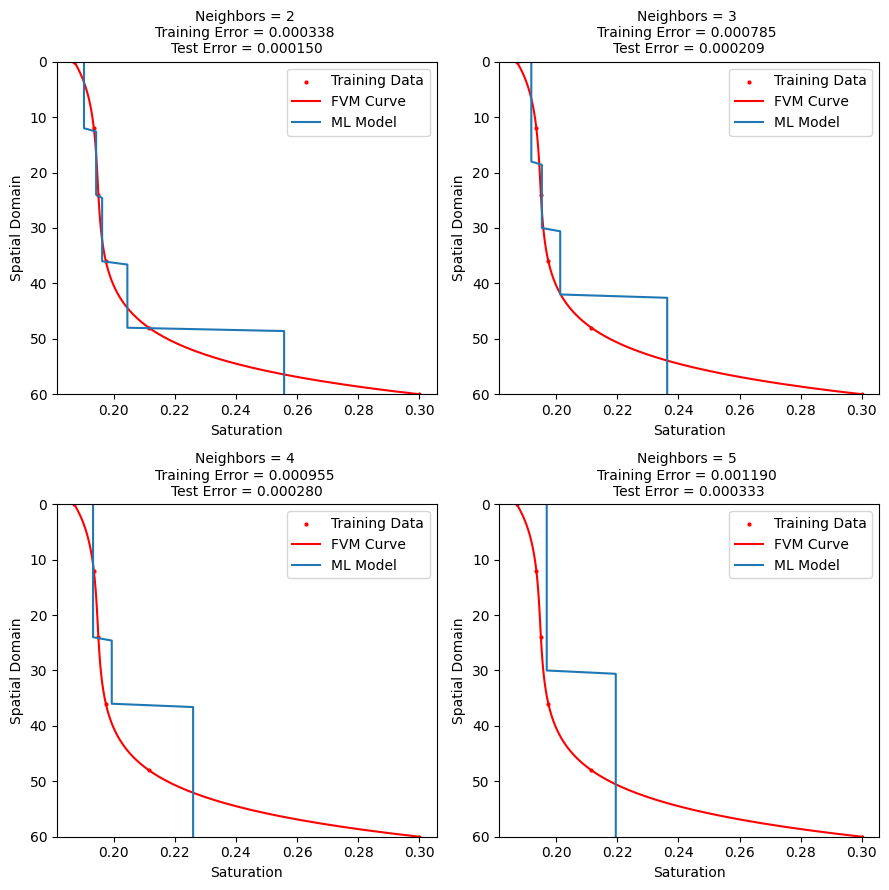

In [233]:
from sklearn.neighbors import KNeighborsRegressor
plt.figure(figsize=(9,9))

# Fit model for several degrees and collect error
neighbors = [2,3,4,5]
knn_train_err = []
knn_test_err = []
knn_max_err = []
for n in neighbors:
    # Fit the model
    knn_reg = KNeighborsRegressor(n_neighbors=n)
    knn_reg.fit(X_train.reshape(-1,1), y_train)
    
    # Collect accuracy metric
    y_predict = knn_reg.predict(X_test.reshape(-1,1))
    test_err = mean_squared_error(y_predict, y_test)
    train_err = mean_squared_error(y_train, knn_reg.predict(X_train.reshape(-1,1)))
    knn_train_err.append(train_err)
    knn_test_err.append(test_err)
    max_err = np.max(np.abs(y_test-y_predict))
    knn_max_err.append(max_err)

    # Plot 
    plt.subplot(2,2,n-1)
    plt.scatter(y_train, X_train, s=4, color="red", label="Training Data")
    plt.plot(y,X, color="red", label="FVM Curve")
    plt.plot(knn_reg.predict(X.reshape(-1,1)), X, label = "ML Model")
    plt.title('Neighbors = %d \nTraining Error = %f \nTest Error = %f' %(n,train_err, test_err), fontsize=10)
    applyPlotStyle()
    plt.legend()

plt.tight_layout()


Text(0, 0.5, 'Error')

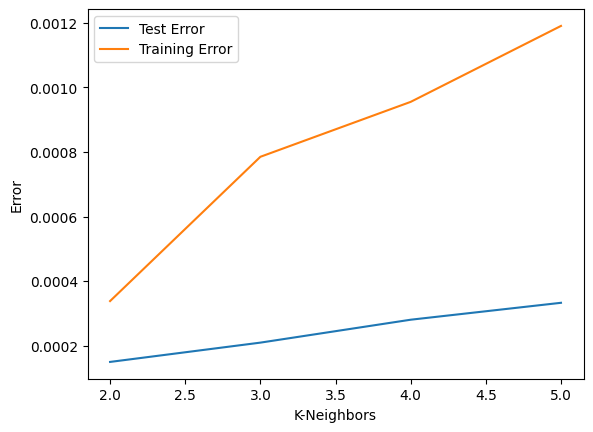

In [234]:
#Plot Training Test Error
plt.plot(neighbors, knn_test_err, label="Test Error")
plt.plot(neighbors, knn_train_err, label="Training Error")
plt.legend()
plt.xlabel('K-Neighbors')
plt.ylabel('Error')

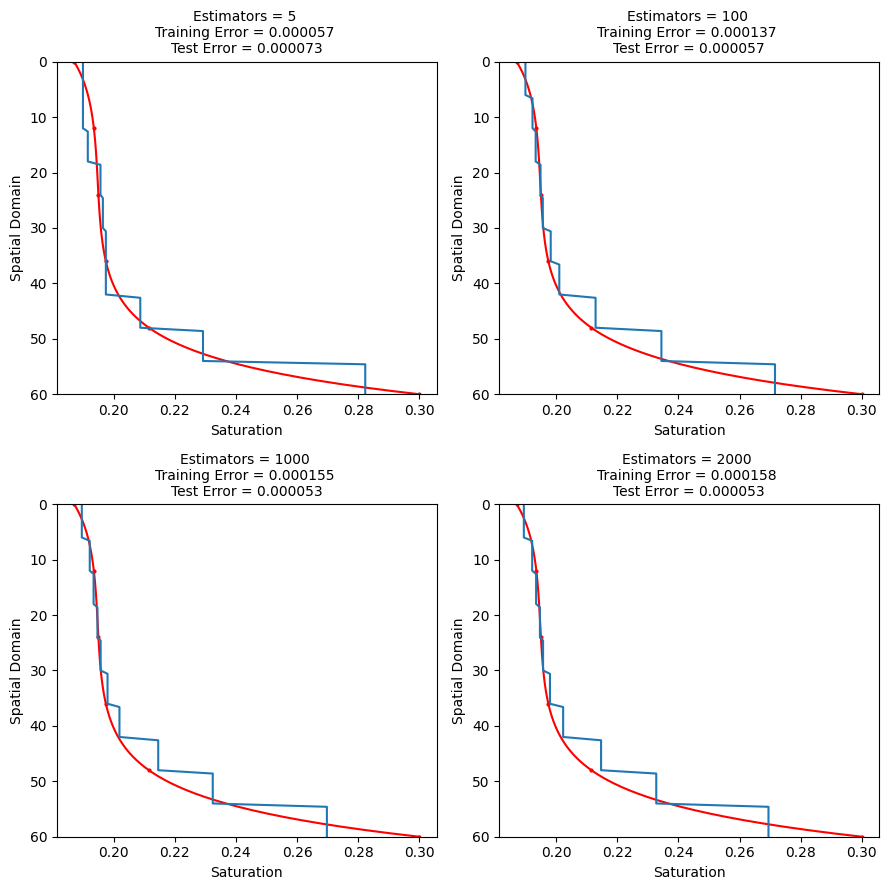

In [235]:
from sklearn.ensemble import RandomForestRegressor
plt.figure(figsize=(9,9))

# Fit model for several degrees depths and collect error
estimators = [5,100,1000,2000]
forest_train_err = []
forest_test_err = []
forest_max_err = []
p = 0
for d in estimators:
    p+=1
    # Fit the model
    forest_features = X_train.reshape(-1,1)
    forest_reg = RandomForestRegressor(n_estimators=d, random_state=0)
    forest_reg.fit(tree_features, y_train)

    # Collect accuracy metric
    y_predict = forest_reg.predict(X_test.reshape(-1,1))
    test_err = mean_squared_error(y_predict, y_test)
    train_err = mean_squared_error(y_train, forest_reg.predict(forest_features))
    forest_train_err.append(train_err)
    forest_test_err.append(test_err)
    max_err = np.max(np.abs(y_test-y_predict))
    forest_max_err.append(max_err)

    # Plot 
    plt.subplot(2,2,p)
    plt.scatter(y_train, X_train, s=4, color="red", label="Training Data")
    plt.plot(y,X, color="red", label="FVM Curve")
    plt.plot(forest_reg.predict(X.reshape(-1,1)), X, label="ML Model")
    plt.title('Estimators = %d \nTraining Error = %f \nTest Error = %f' %(d,train_err, test_err), fontsize=10)
    applyPlotStyle()

plt.tight_layout()





Text(0, 0.5, 'Error')

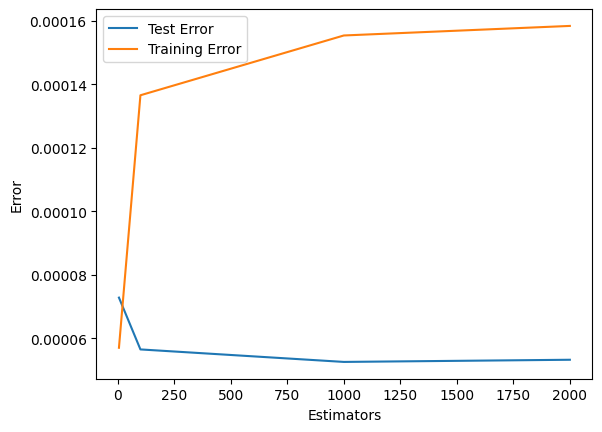

In [236]:
#Plot Training Test Error
plt.plot(estimators, forest_test_err, label="Test Error")
plt.plot(estimators, forest_train_err, label="Training Error")
plt.legend()
plt.xlabel('Estimators')
plt.ylabel('Error')

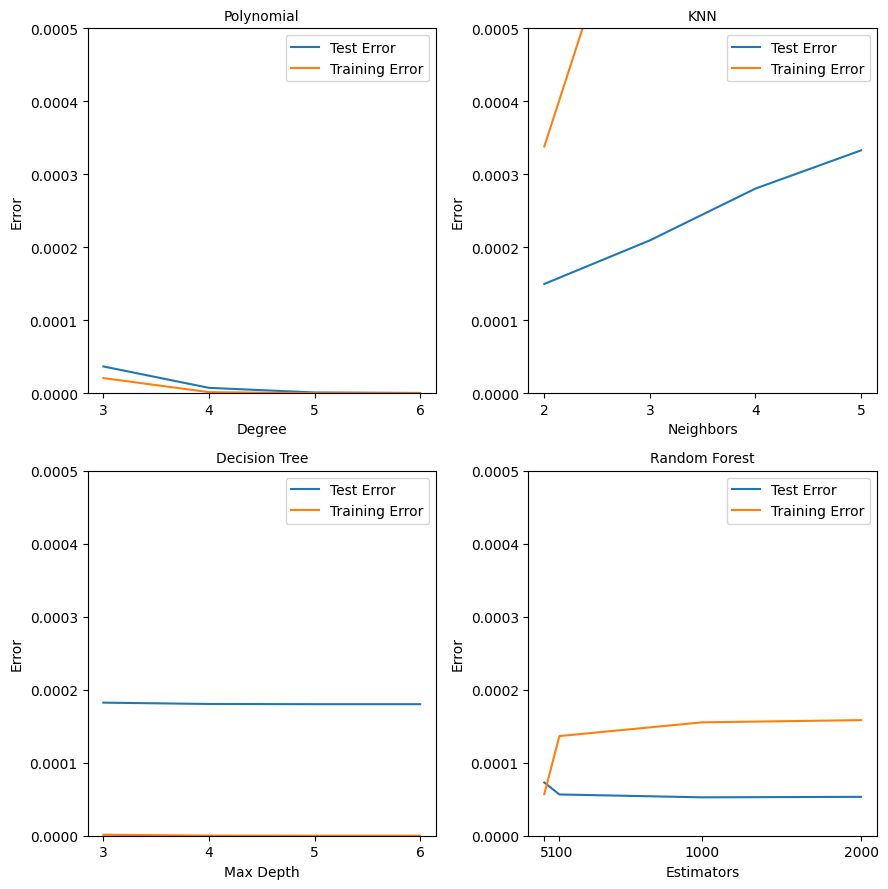

In [237]:
# Plot Errors
plt.figure(figsize=(9,9))
ylim = 0.0005

plt.subplot(2,2,1)
plt.plot(deg, poly_test_err, label="Test Error")
plt.plot(deg, poly_train_err, label="Training Error")
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Error')
plt.title('Polynomial', fontsize=10)
plt.xticks(deg)
plt.ylim(0,ylim)

plt.subplot(2,2,2)
plt.plot(neighbors, knn_test_err, label="Test Error")
plt.plot(neighbors, knn_train_err, label="Training Error")
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Error')
plt.title('KNN', fontsize=10)
plt.xticks(neighbors)
plt.ylim(0,ylim)

plt.subplot(2,2,3)
plt.plot(depth, tree_test_err, label="Test Error")
plt.plot(depth, tree_train_err, label="Training Error")
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Decision Tree', fontsize=10)
plt.xticks(depth)
plt.ylim(0,ylim)

plt.subplot(2,2,4)
plt.plot(estimators, forest_test_err, label="Test Error")
plt.plot(estimators, forest_train_err, label="Training Error")
plt.legend()
plt.xlabel('Estimators')
plt.ylabel('Error')
plt.title('Random Forest', fontsize=10)
plt.xticks(estimators)
plt.ylim(0,ylim)

plt.tight_layout()


[0.04152461375844041, 0.030807988775805262, 0.028975640846577666, 0.028679211491415946]
[0.05921733675246399, 0.05921733675246399, 0.05921733675246399, 0.05921733675246399]
[0.042622120175239975, 0.05442500908888068, 0.06475225440145677, 0.07124785931746322]
[0.013418781053416484, 0.006718248869838517, 0.003038465876970431, 0.0017569081189625357]


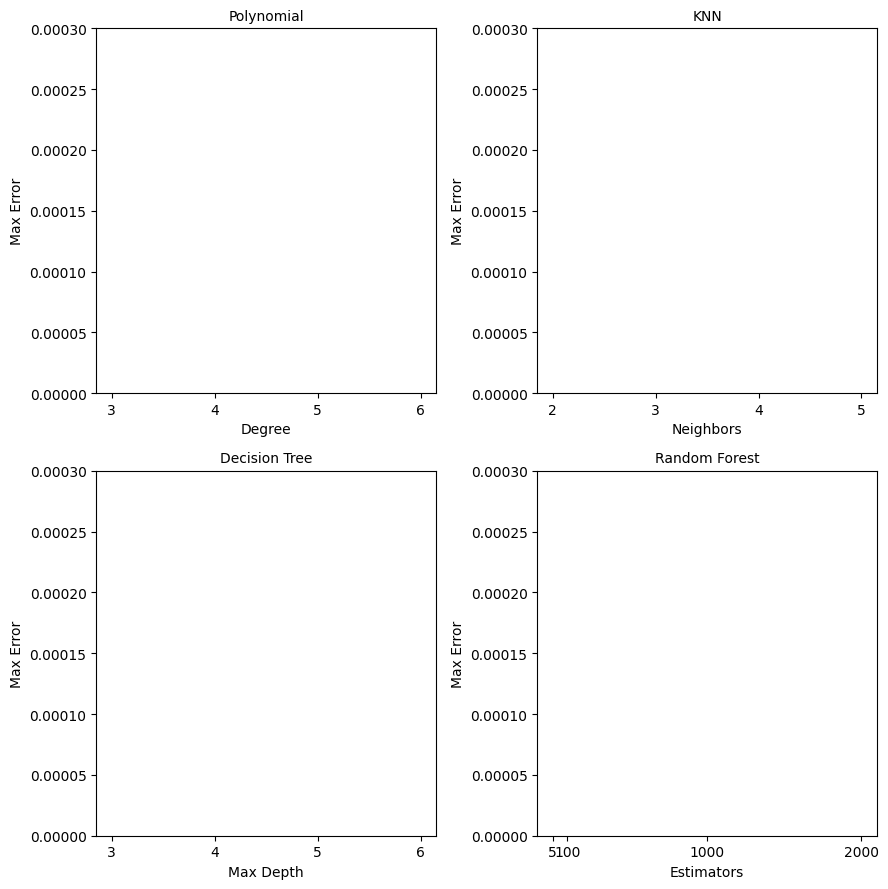

In [238]:
# Plot Max Error

plt.figure(figsize=(9,9))
yylim=0.0003

plt.subplot(2,2,1)
plt.scatter(deg, poly_max_err)
plt.xlabel('Degree')
plt.ylabel('Max Error')
plt.title('Polynomial', fontsize=10)
plt.xticks(deg)
plt.ylim(0,yylim)

plt.subplot(2,2,2)
plt.scatter(neighbors, knn_max_err)
plt.xlabel('Neighbors')
plt.ylabel('Max Error')
plt.title('KNN', fontsize=10)
plt.xticks(neighbors)
plt.ylim(0,yylim)

plt.subplot(2,2,3)
plt.scatter(depth, tree_max_err)
plt.xlabel('Max Depth')
plt.ylabel('Max Error')
plt.title('Decision Tree', fontsize=10)
plt.xticks(depth)
plt.ylim(0,yylim)

plt.subplot(2,2,4)
plt.scatter(estimators, forest_max_err)
plt.xlabel('Estimators')
plt.ylabel('Max Error')
plt.title('Random Forest', fontsize=10)
plt.xticks(estimators)
plt.ylim(0,yylim)

plt.tight_layout()
print(forest_max_err)
print(tree_max_err)
print(knn_max_err)
print(poly_max_err)

